In [19]:
# I confirm that I did not use ChatGPT or codes from the web or from past years’ assignments and that the work I submit is my own and my own only

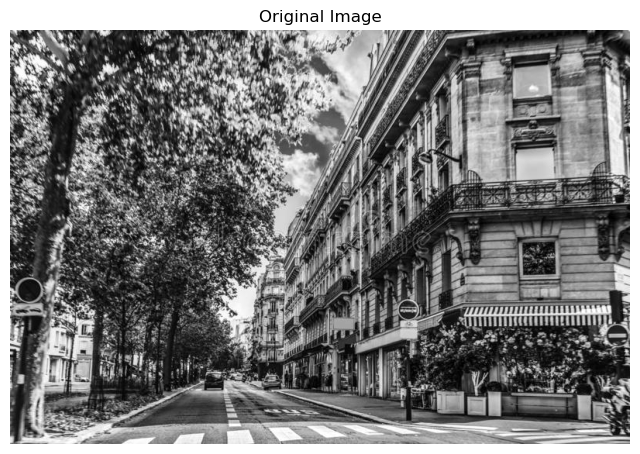

In [20]:
# first step is to preprocess the image into greyscale
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('Paris.jpg').convert('L') # convrting image into array
image_array = np.array(image)

plt.figure(figsize=(8, 6))
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

U, S, Vt = np.linalg.svd(image_array, full_matrices=False) # this does SVD 

In [21]:
# question 1
def terms(values, threshold):
    total_energy = np.sum(values ** 2)
    retained = 0

    # as soon as they break the threshold, we can exit
    for i, value in enumerate(values):
        retained += value ** 2
        if (retained / total_energy) >= threshold:
            return i + 1

energy_threshold = 0.99
num_terms = terms(S, energy_threshold)
print(f"Number of terms to retain 99% of the image information: {num_terms}")

Number of terms to retain 99% of the image information: 150


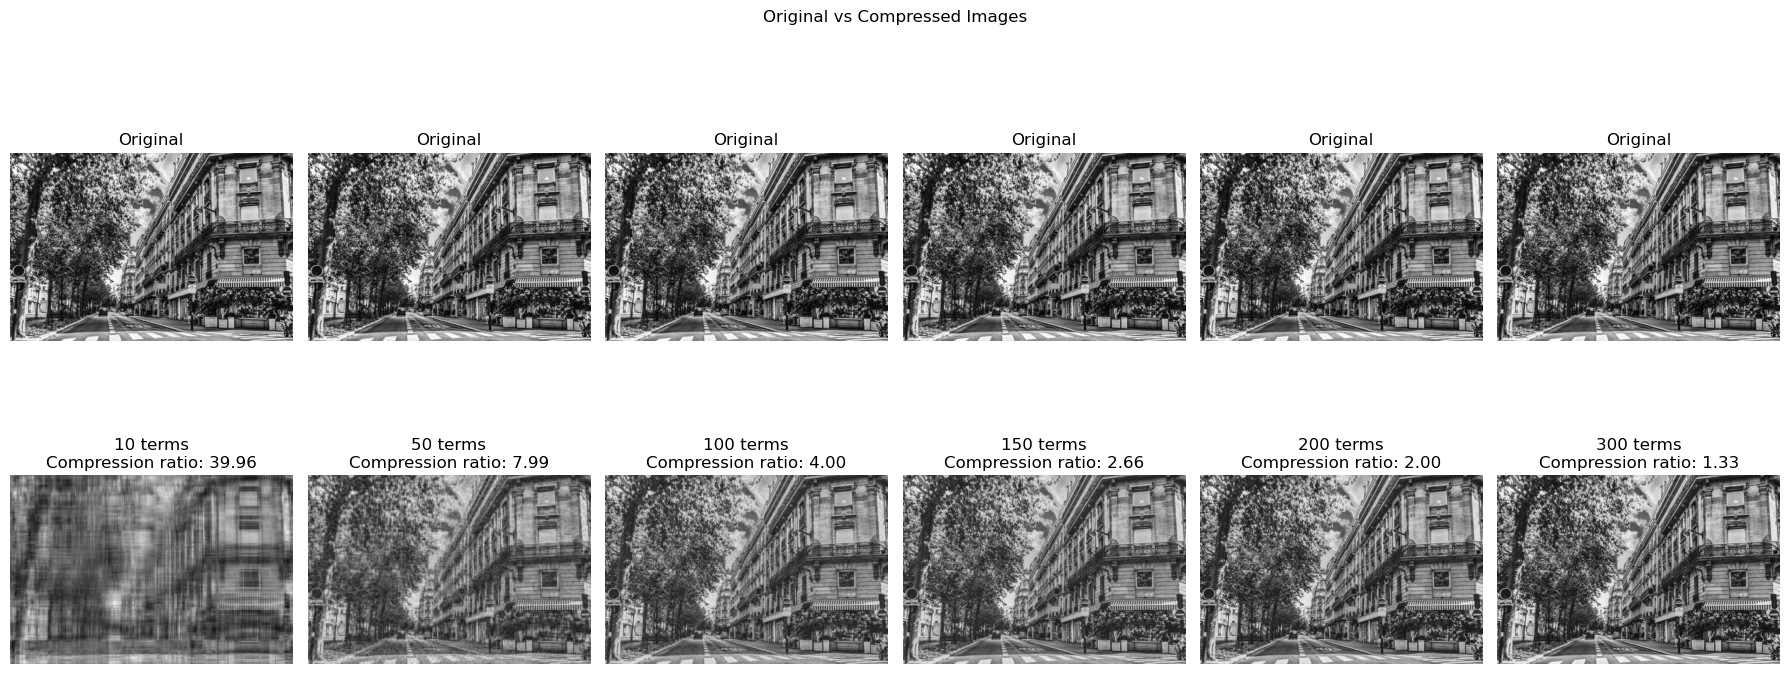

Based on the visual comparison, k = 150 terms appears to be the best balance between compression and image quality.


In [22]:
# question 2
def compress_image(U, S, Vt, k):
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, S[:k])
    compressed_image = U[:, :k] @ S_k @ Vt[:k, :]
    return compressed_image

term_values = [10, 50, 100, 150, 200, 300]

fig, axes = plt.subplots(2, len(term_values), figsize=(18, 8))

for i, k in enumerate(term_values):
    compressed_image = compress_image(U, S, Vt, k)
    axes[0, i].imshow(image_array, cmap='gray')
    axes[0, i].set_title(f"Original")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(compressed_image, cmap='gray')
    axes[1, i].set_title(f"{k} terms\nCompression ratio: {image_array.size / (k * (U.shape[0] + Vt.shape[0] + 1)):.2f}")
    axes[1, i].axis('off')

plt.suptitle("Original vs Compressed Images")
plt.tight_layout()
plt.show()

print(f"Based on the visual comparison, k = 150 terms appears to be the best balance between compression and image quality.")